In [7]:
import numpy as np
import pandas as pd
import os
import cv2
Covid = os.listdir("C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\test\\Covid")
Normal=os.listdir("C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\test\\Normal")

# import os
# for dirname, _, filenames in os.walk('C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [8]:

train_dir = r'C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\train\\'
test_dir= r'C:\\Users\\DELL\\Documents\\Amrita\\Codes\\Sem_5_Codes\\Covid19-dataset\\test\\'

In [9]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

categories = {'Covid': 0, 'Normal': 1}
x_train, y_train = [], []
x_test, y_test = [], []


for category in categories:
    label = categories[category]
    path = os.path.join(train_dir, category)
    if not os.path.exists(path):
        print(f"Directory not found: {path}")
        continue
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to load image: {img_path}")
            continue
        image = cv2.resize(image, (500, 500))
        image = image / 255.0
        x_train.append(image)
        y_train.append(label)

for category in categories:
    label = categories[category]
    path = os.path.join(test_dir, category)
    if not os.path.exists(path):
        print(f"Directory not found: {path}")
        continue
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to load image: {img_path}")
            continue
        image = cv2.resize(image, (500, 500))
        image = image / 255.0
        x_test.append(image)
        y_test.append(label)
# Check if x_train is still empty
if not x_train:
    print("x_train is empty.")
else:
    # Convert lists to numpy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)

    # Convert labels to one-hot encoding
    y_train = to_categorical(y_train, num_classes=2)
    y_test = to_categorical(y_test, num_classes=2)

    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    datagen.fit(x_train)
    
    # Now you can use x_train, y_train, x_test, and y_test to train your model


In [10]:
x_test

array([[[[0.97647059, 0.97647059, 0.97647059],
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96862745, 0.96862745],
         ...,
         [0.87058824, 0.87058824, 0.87058824],
         [0.85098039, 0.85098039, 0.85098039],
         [0.85098039, 0.85098039, 0.85098039]],

        [[0.99215686, 0.99215686, 0.99215686],
         [0.97254902, 0.97254902, 0.97254902],
         [0.96470588, 0.96470588, 0.96470588],
         ...,
         [0.62352941, 0.62352941, 0.62352941],
         [0.61960784, 0.61960784, 0.61960784],
         [0.61960784, 0.61960784, 0.61960784]],

        [[0.85882353, 0.85882353, 0.85882353],
         [0.81960784, 0.81960784, 0.81960784],
         [0.79607843, 0.79607843, 0.79607843],
         ...,
         [0.12156863, 0.12156863, 0.12156863],
         [0.11764706, 0.11764706, 0.11764706],
         [0.11764706, 0.11764706, 0.11764706]],

        ...,

        [[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941]

In [11]:
x_train_flat = x_train.reshape(1,-1)
y_train_flat = y_train.reshape(1,-1)
x_test_flat = x_test.reshape(1,-1)
y_test_flat = y_test.reshape(1,-1)

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score



model = xgb.XGBClassifier(objective="binary:logistic", eval_metric='logloss')
model.fit(x_train_flat, y_train_flat)

cross_val_score(model, x_train_flat, y_train_flat, cv=5)

# 5. Model Evaluation

XGBoostError: bad allocation

In [ ]:

predictions = model.predict(x_test_flat)
print("Accuracy: ", accuracy_score(y_test_flat, predictions))
print("\nClassification Report:\n", classification_report(y_test_flat, predictions))

Accuracy:  0.9791666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.95      0.98        22

   micro avg       0.98      0.98      0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48
 samples avg       0.98      0.98      0.98        48



In [ ]:
image = cv2.imread("C:\\Users\\shrey\\Desktop\\Amrita Vishwa Vidyapeetham\\Semester 5\\19CSE305\\ml mini project\\sam.jpeg")
if image is None:
    print(f"Failed to load image: {img_path}")
image = cv2.resize(image, (500, 500))
a = []
a.append(image.flatten())
a= np.array(a)

print(model.predict(a[0].reshape(1, -1)))
print(y_test_flat[0])

[[1. 0.]]
[1 0]


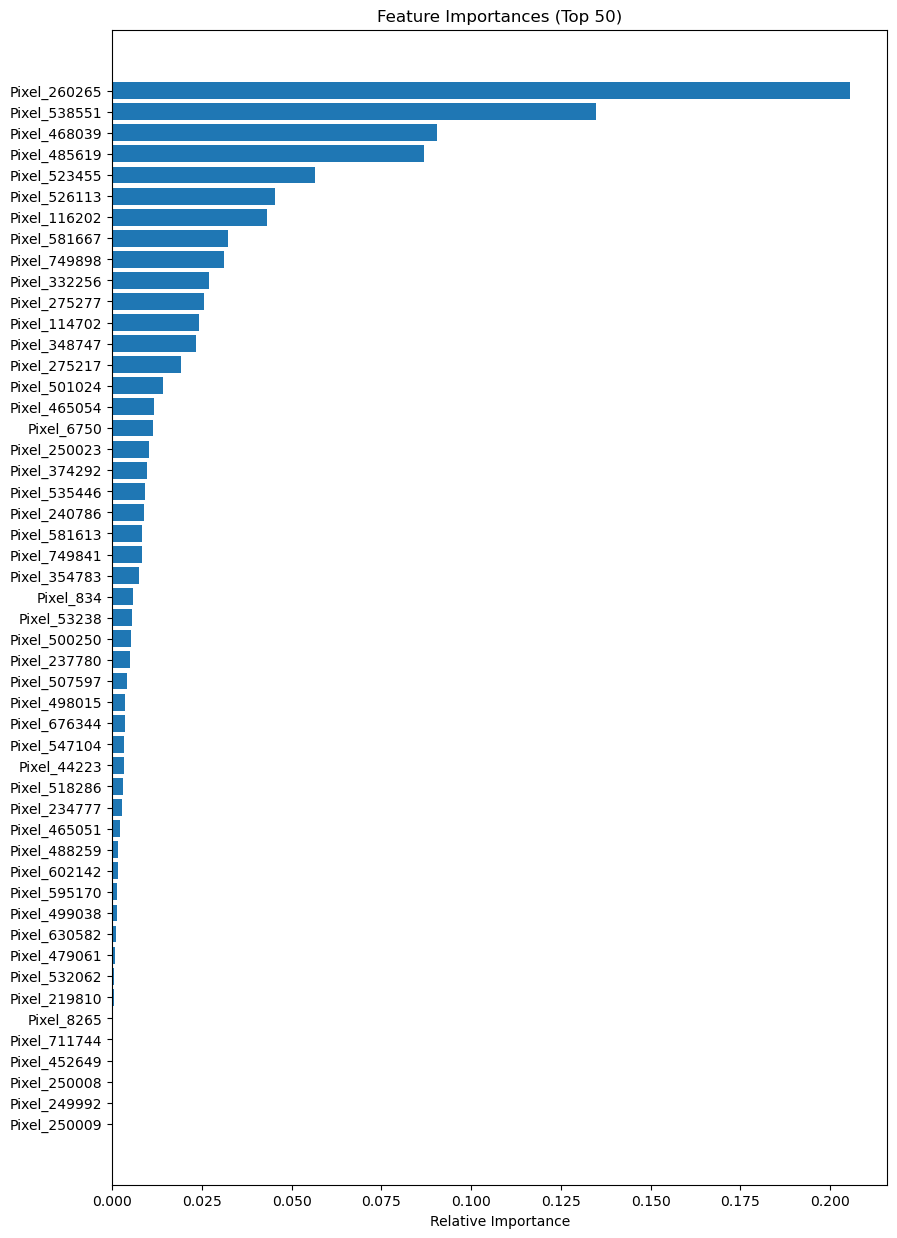

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Create indices for the features
indices = np.argsort(importances)

# Plot the top 'n' feature importances. For this example, let's use 50
top_n = 50
sorted_idx = indices[-top_n:]

plt.figure(figsize=(10, 15))
plt.title("Feature Importances (Top 50)")
plt.barh(range(top_n), importances[sorted_idx], align="center")
plt.yticks(range(top_n), [f"Pixel_{i}" for i in sorted_idx])
plt.xlabel("Relative Importance")
plt.show()


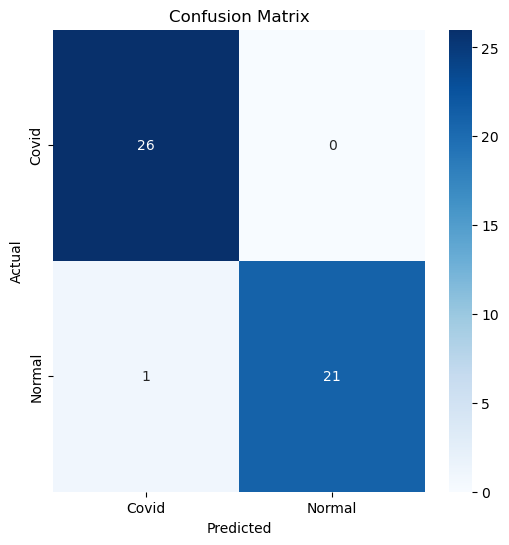

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test_flat)
y_pred = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test_flat, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories.keys(), yticklabels=categories.keys())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()